# TP 3
Author : MARZAT Noé

In [2]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

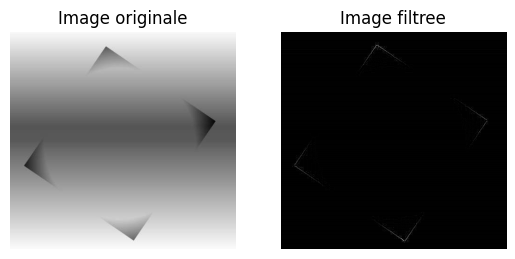

In [3]:
img1 = cv.imread("img-tp3/TP3I01.jpg", cv.IMREAD_GRAYSCALE)

kernel = np.array([ [-1, -1, -1], 
                    [-1,  8, -1], 
                    [-1, -1, -1]])

img2 = cv.filter2D(img1, -1, kernel)

# Afficher l'image originale et le spectre de Fourier
plt.subplot(121), plt.imshow(img1, cmap="gray")
plt.title("Image originale"), plt.axis("off")
plt.subplot(122), plt.imshow(img2, cmap="gray")
plt.title("Image filtree"), plt.axis("off")
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


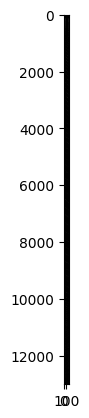

In [16]:
rho_resolution = 1  # Résolution de la distance rho en pixels
theta_resolution = np.pi / 180  # Résolution de l'angle theta en radians
threshold = 100  # Seuil pour la détection de lignes
lines = cv.HoughLines(img2, rho_resolution, theta_resolution, threshold)

# Création de la matrice de vote
vote_matrix = np.zeros((len(lines), 180))

# Remplissage de la matrice de vote
for i in range(len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    vote_matrix[i, int(np.degrees(theta))] += 1

print(vote_matrix)

def imagesc(img1):
    img2 = ((img1 - np.min(img1)) / (np.max(img1) - np.min(img1)))
    plt.imshow(img2, cmap="gray")

imagesc(vote_matrix)